# ML Classification Assignment

The project work consists of three main parts: Explanatory Data Analysis, Data Preparation and Constructing the Models.

In the Explanatory Data Analysis part, we analyzed data we had, checked  if the data is unbalanced and did correlation analysis.

In the Data Preparation part, to balance the data, we compare the methods of oversampling and downsampling and we decided to do oversampling because of better results. Then, to categorical data we assigned dummies and applied scaling for numerical data. Finally, we splitted the data to train and test sets.

In the last part, we applied different classification modelr. For our data we used f1 score and found best hyper parameters for each model by using the Grid Search. The best result was given by Random Forest Model with f1=0.92. 

## Data Import

In [4]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("model.csv")

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) #We also don't need the column with numbers of rows, so it can be eluminated

In [4]:
df['id'].nunique() #We checked our data for uniqueness, using id

49999

In [5]:
df=df.drop(columns=['id']) #id is a random unique value for each customer, so we dont need this for classification and we can eliminate them
df.sample(5)

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
40614,Female,Premium,49.0,57.30,New,Entertainment,1,1,4,5,5,5,2,4,4,0,0,Satisfied
49021,Female,Premium,25.0,2.82,New,Sport,5,2,2,4,3,4,3,5,2,0,0,Not Satisfied
22201,Male,Premium,44.0,200.42,New,Technology,2,2,4,2,2,2,1,2,2,0,0,Not Satisfied
40105,Male,Premium,38.0,94.29,New,Home/Kitchen,4,3,3,5,4,5,4,4,3,0,0,Not Satisfied
13189,Male,Premium,25.0,99.66,New,Sport,1,1,2,2,2,3,1,3,2,0,0,Not Satisfied


In [6]:
df.describe()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
count,46132.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.601817,118.785945,3.061120,2.977920,3.190460,3.36630,3.335460,3.621360,3.300540,3.632180,3.271140,0.110160,0.112240
std,13.534615,99.695572,1.527177,1.277241,1.333109,1.28934,1.316481,1.181296,1.266605,1.175362,1.315727,0.412393,0.415121
min,18.000000,1.020000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,42.560000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,41.000000,84.395000,3.000000,3.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,52.000000,172.600000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000
max,85.000000,540.630000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,16.000000


In [7]:
df.info(verbose=True)
#We looked at the types of data in our dataset and number of non-null cells in each column. 
#There are null cells in Age column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              50000 non-null  object 
 1   Customer Type                       50000 non-null  object 
 2   Age                                 46132 non-null  float64
 3   Price                               50000 non-null  float64
 4   NewUsed                             50000 non-null  object 
 5   Category                            50000 non-null  object 
 6   Product description accuracy        50000 non-null  int64  
 7   Manufacturer sustainability         50000 non-null  int64  
 8   Packaging quality                   50000 non-null  int64  
 9   Additional options                  50000 non-null  int64  
 10  Helpfulness of reviews and ratings  50000 non-null  int64  
 11  Integrity of packaging              50000

In [8]:
df.isna().sum() 
#Count the number of null cells in Age column

Gender                                   0
Customer Type                            0
Age                                   3868
Price                                    0
NewUsed                                  0
Category                                 0
Product description accuracy             0
Manufacturer sustainability              0
Packaging quality                        0
Additional options                       0
Helpfulness of reviews and ratings       0
Integrity of packaging                   0
Ease check-out procedure                 0
Relevance of related products            0
Costumer insurance                       0
Shipping delay in days                   0
Arrival delay in days                    0
Satisfaction                             0
dtype: int64

## Missing Data

In [9]:
df['Age'].unique() 
#We looked at unique data of Age column

array([60., 57., 38., nan, 37., 58., 46., 68., 31., 64., 51., 36., 25.,
       24., 65., 66., 43., 34., 59., 26., 33., 48., 27., 54., 41., 56.,
       23., 55., 49., 29., 22., 35., 39., 52., 70., 20., 50., 28., 45.,
       67., 21., 44., 69., 63., 30., 72., 40., 42., 47., 61., 62., 18.,
       32., 53., 19., 75., 71., 78., 74., 73., 80., 79., 77., 85., 76.])

In [10]:
target_dist=df.groupby('Age').size()
print(target_dist)

Age
18.0     498
19.0     427
20.0     740
21.0     719
22.0    1161
        ... 
77.0      46
78.0      22
79.0      13
80.0      41
85.0       9
Length: 64, dtype: int64


Age
18.0     498
19.0     427
20.0     740
21.0     719
22.0    1161
        ... 
77.0      46
78.0      22
79.0      13
80.0      41
85.0       9
Length: 64, dtype: int64


<AxesSubplot:xlabel='Age'>

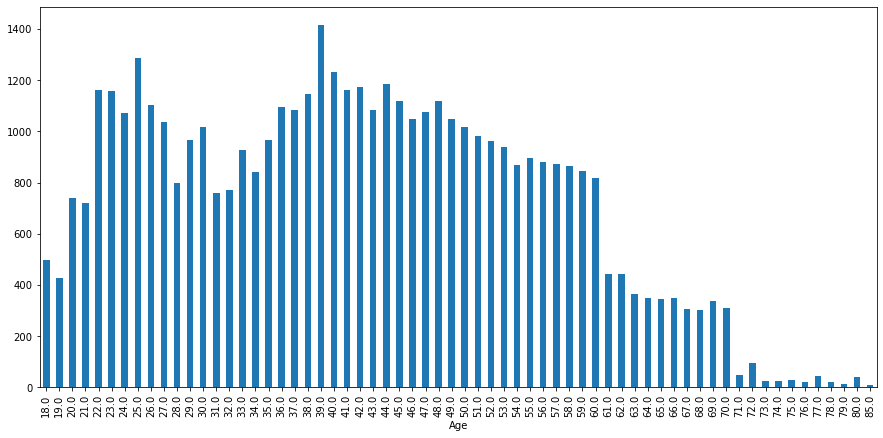

In [11]:
#Then we calculated the number of rows with each unique data of Age column and created a graph using these data

%matplotlib inline
import matplotlib.pyplot as plt

dtarget_dist=df.groupby('Age').size() #Then we calculated the number of rows with each unique data of Age column and created a graph using these data
print(dtarget_dist)
fig, ax = plt.subplots(figsize=(15,7))
dtarget_dist.plot.bar()
#In the graph there is distribution of Age

In [12]:
#We tried two methods for handling the missing data: Substitution with mode and dropping the row. 
#df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df=df.dropna(axis=0)
#Trying both, we detected that dropping the columns gave better f1 result. So, we use that one.

## 1.EXPLANATORY DATA ANALYSIS

In [13]:
#Encoded categorical feature "Satisfaction" as a one-hot numeric array
df["Satisfied"] = pd.get_dummies(df['Satisfaction'],drop_first=True)  
df=df.drop(columns=['Satisfaction'])
df.sample(5)

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfied
38889,Male,Premium,19.0,40.68,New,Technology,4,3,3,4,3,5,5,4,3,0,0,0
37559,Male,Not Premium,25.0,212.52,New,Other,5,2,4,3,5,4,3,4,4,0,0,0
38881,Female,Premium,44.0,358.88,New,Entertainment,5,5,2,3,3,3,4,3,4,0,0,0
8094,Female,Premium,60.0,144.32,New,Other,4,5,1,4,5,4,3,5,1,0,0,0
8021,Male,Premium,62.0,44.39,New,Entertainment,3,4,2,5,3,5,2,5,3,0,0,0


In [14]:
#We counted "Satisfaction" results frequency
print(df.groupby('Satisfied').size())

Satisfied
0    26207
1    19925
dtype: int64


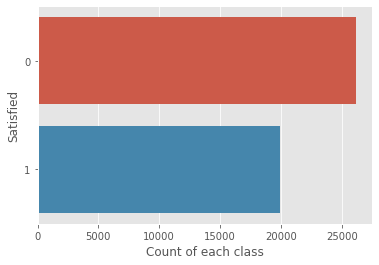

In [15]:
#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Next step we visualize Satisfactiction Counts
sns.countplot(y=df.Satisfied ,data=df)
plt.xlabel("Count of each class")
plt.ylabel("Satisfied")
plt.show()
#We can see that data is imbalanced.

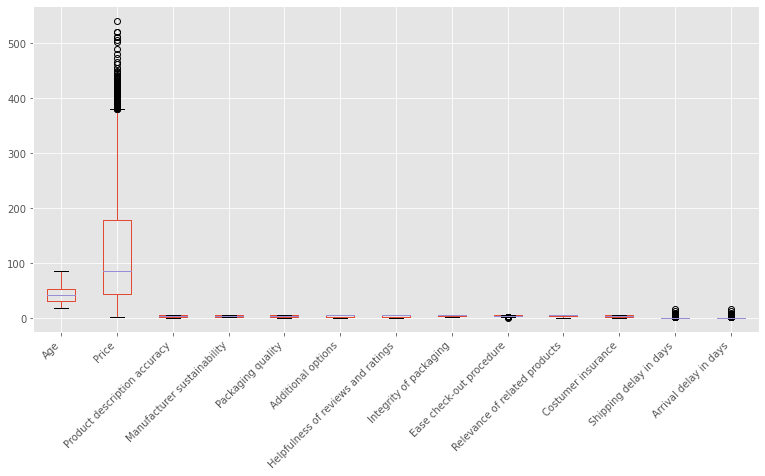

In [16]:
#Using boxplot graph we displayed the distribution of our data
%matplotlib inline
fig, ax = plt.subplots(figsize=(13,6))
columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days']
df[columns].boxplot()

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

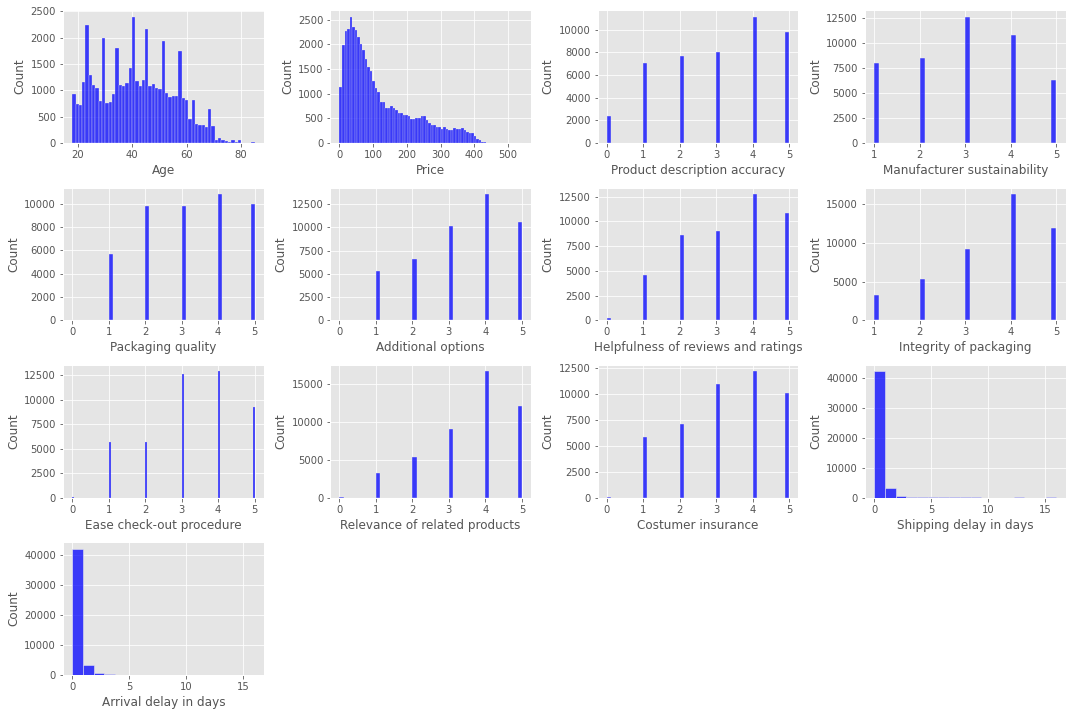

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df[columns]

columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days']

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15,10))

for i, ax in zip(range(len(columns)), axes.flat):
    sns.histplot(X.iloc[:,i], color="blue", ax=ax)
axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off')
fig.tight_layout()

plt.show()
#In these graphs we can see distribution of all of our variables

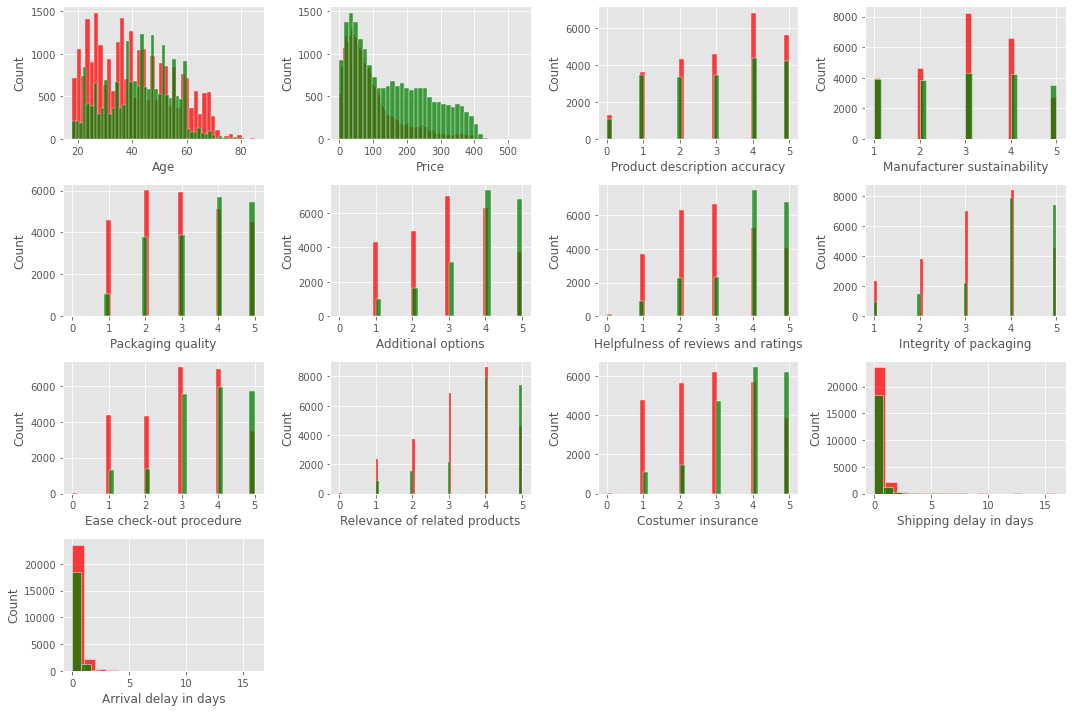

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days','Satisfied']

X=df[columns]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15,10))

X0 = X[X['Satisfied']==0]
X1 = X[X['Satisfied']==1]


for i, ax in zip(range(len(columns)-1), axes.flat):
    sns.histplot(X0.iloc[:,i], color="red", ax=ax)
    sns.histplot(X1.iloc[:,i], color="green", ax=ax)
axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off')
fig.tight_layout()
plt.show()

#These graphs show us difference in data groups between two "Satisfaction" groups. 
#The green color presents the data about satisfied customers, the red one - unsatisfied.
#Because the data is imbalanced, we can't understand the relative differences between satisfied and unsatisfied people.

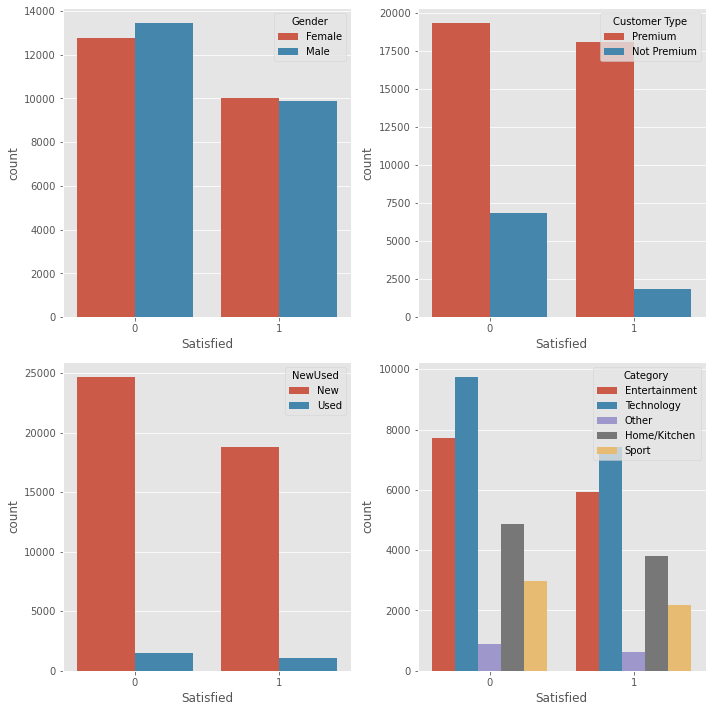

In [19]:
%matplotlib inline

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

columns=['Gender','Customer Type','NewUsed','Category','Satisfied']

for i, col in enumerate(columns[:-1]):
    sns.countplot(x="Satisfied", hue=col, data=df, ax=axes[int(i/2),i%2])
fig.tight_layout()
plt.show()
#We compared the quantity of satisfied and unsatisfied customers depending on their gender, type and category of products they bought.

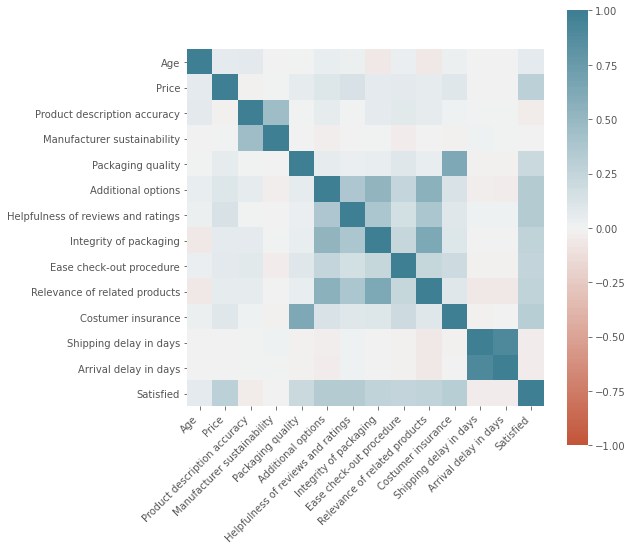

In [20]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); 
#We found the correlations between our variables. There is no perfect correlation between variables and most of them are positive
#We also don't have features which are completely correlated to each other, so we leave all of our features for the futher analysis

# 2.DATA PREPARATION

## Oversampling

In [21]:
from sklearn.utils import resample

#Because of the fact that data about customer satisfaction is imbalanced, we want to balance it.
#We tried down-sampling and over-sampling. Over-sampling gave us a better result in terms of f1, so we used this one. 

#1) Define majority and minority classes
df_majority = df[df.Satisfied==0] 
df_minority = df[df.Satisfied==1] 

#2) Oversample minority class 
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=26207,   # number of samples into the minority class
                                   random_state=123)  # reproducible results
                                    
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])

#4) Display new class counts 
df_oversampled.Satisfied.value_counts()

0    26207
1    26207
Name: Satisfied, dtype: int64

In [22]:
df.head()

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfied
0,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
4,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
5,Female,Premium,58.0,86.06,New,Technology,3,3,4,5,5,5,5,1,4,0,0,1


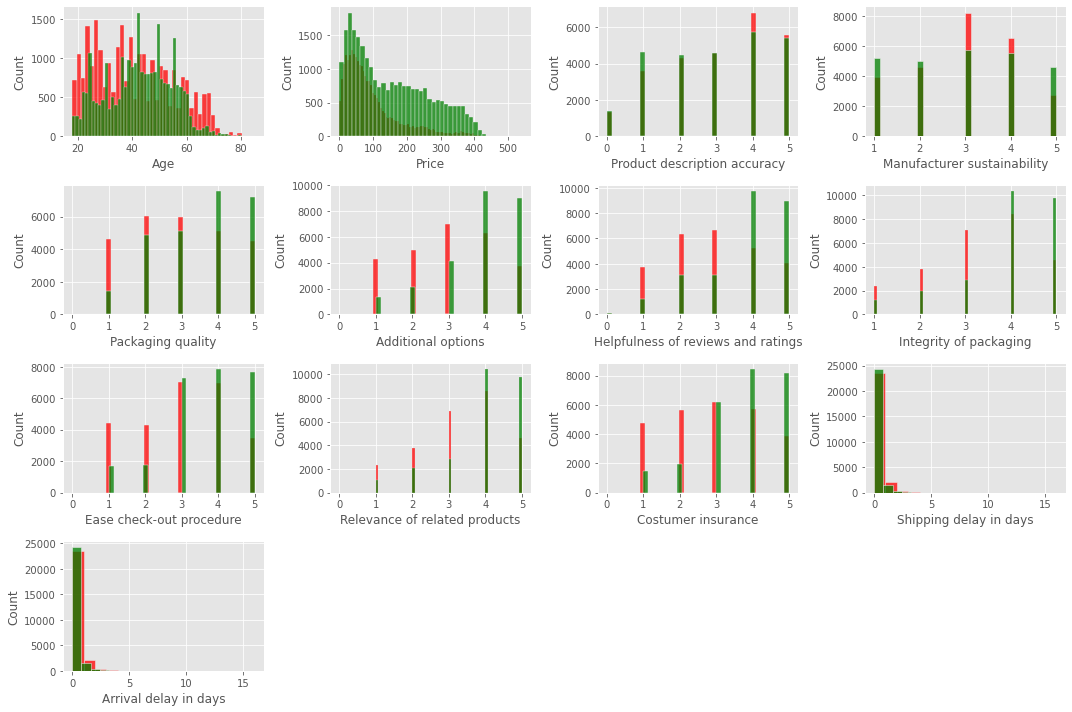

In [23]:
#We will plot these graphs again to visualise the differences between satisfied and unsatisfied people in terms of each variable.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days','Satisfied']

X=df_oversampled[columns]
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15,10))

X0 = X[X['Satisfied']==0]
X1 = X[X['Satisfied']==1]


for i, ax in zip(range(len(columns)-1), axes.flat):
    sns.histplot(X0.iloc[:,i], color="red", ax=ax)
    sns.histplot(X1.iloc[:,i], color="green", ax=ax)
axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off')
fig.tight_layout()
plt.show()

#These graphs show us difference in data groups between two "Satisfaction" groups. 
#The green color presents the data about satisfied customers, the red one - unsatisfied.

## Converting Categorical Data to Dummy Variables

In [24]:
#We needed to assign dummy variables for the columns containing categorical data.
columns=['Gender','Customer Type', 'NewUsed', 'Category']

dummy_df=[]
dummy_df=pd.DataFrame(dummy_df)

for i in columns:
    dummy= pd.get_dummies(df_oversampled[i],drop_first=True)
    #drop_first=True --> Whether to get k-1 dummies out of k categorical levels by removing the first level.
    dummy_df = pd.concat([dummy_df,dummy], axis = 1)

df_oversampled=pd.concat([dummy_df,df_oversampled], axis = 1)

In [25]:
df_oversampled.drop(columns=columns,inplace=True)

In [26]:
df_oversampled.head()

,Male,Premium,Used,Home/Kitchen,Other,Sport,Technology,Age,Price,Product description accuracy,...,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfied
39328,1,1,0,0,0,0,0,56.0,332.21,1,...,5,5,5,5,4,5,3,0,0,1
44274,1,1,0,0,0,0,1,49.0,228.97,3,...,3,4,4,4,3,4,5,0,0,1
38485,0,1,0,0,0,0,0,55.0,33.94,3,...,3,4,4,4,4,4,5,0,0,1
19478,1,0,0,0,0,0,1,23.0,117.96,5,...,3,5,5,5,3,5,3,0,0,1
33582,0,1,0,0,0,0,1,54.0,93.13,2,...,5,4,4,4,4,4,5,0,0,1


## Scaling

In [27]:
#For further analysis we needed to scale our data.
from sklearn.preprocessing import StandardScaler

columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days']

scaler = StandardScaler().fit(df_oversampled[columns]) 
scaler

#We scaled only the numerical variables.

StandardScaler()

In [28]:
scaled_data = scaler.transform(df_oversampled[columns])

In [29]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = columns

scaled_df.head() 
#We got the scaled data

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,1.072114,2.021084,-1.321866,-1.523684,1.326472,1.215686,1.219341,1.134858,0.508637,1.132163,-0.266346,-0.262725,-0.266012
1,0.547405,1.016638,-0.014899,0.018552,-0.186799,0.436316,0.456585,0.289312,-0.285942,0.282429,1.271804,-0.262725,-0.266012
2,0.997155,-0.880855,-0.014899,0.018552,-0.186799,0.436316,0.456585,0.289312,0.508637,0.282429,1.271804,-0.262725,-0.266012
3,-1.401513,-0.063405,1.292068,0.018552,-0.186799,1.215686,1.219341,1.134858,-0.285942,1.132163,-0.266346,-0.262725,-0.266012
4,0.922197,-0.304982,-0.668382,-0.752566,1.326472,0.436316,0.456585,0.289312,0.508637,0.282429,1.271804,-0.262725,-0.266012


In [30]:
df_oversampled.drop(columns=columns, inplace=True) 

In [31]:
df_oversampled.head()
#We get only the dummy variables to merge with scaled ones.

,Male,Premium,Used,Home/Kitchen,Other,Sport,Technology,Satisfied
39328,1,1,0,0,0,0,0,1
44274,1,1,0,0,0,0,1,1
38485,0,1,0,0,0,0,0,1
19478,1,0,0,0,0,0,1,1
33582,0,1,0,0,0,0,1,1


In [32]:
df_oversampled.reset_index(drop=True, inplace=True)
scaled_df.reset_index(drop=True, inplace=True)

In [33]:
df_oversampled=pd.concat([df_oversampled,scaled_df], axis = 1) 
#After we scaled variables we merge them with dummy variables

In [34]:
df_oversampled.head()

,Male,Premium,Used,Home/Kitchen,Other,Sport,Technology,Satisfied,Age,Price,...,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,1,1,0,0,0,0,0,1,1.072114,2.021084,...,-1.523684,1.326472,1.215686,1.219341,1.134858,0.508637,1.132163,-0.266346,-0.262725,-0.266012
1,1,1,0,0,0,0,1,1,0.547405,1.016638,...,0.018552,-0.186799,0.436316,0.456585,0.289312,-0.285942,0.282429,1.271804,-0.262725,-0.266012
2,0,1,0,0,0,0,0,1,0.997155,-0.880855,...,0.018552,-0.186799,0.436316,0.456585,0.289312,0.508637,0.282429,1.271804,-0.262725,-0.266012
3,1,0,0,0,0,0,1,1,-1.401513,-0.063405,...,0.018552,-0.186799,1.215686,1.219341,1.134858,-0.285942,1.132163,-0.266346,-0.262725,-0.266012
4,0,1,0,0,0,0,1,1,0.922197,-0.304982,...,-0.752566,1.326472,0.436316,0.456585,0.289312,0.508637,0.282429,1.271804,-0.262725,-0.266012


In [35]:
#We are saving this scaler to use it later for the prediction dataset.
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

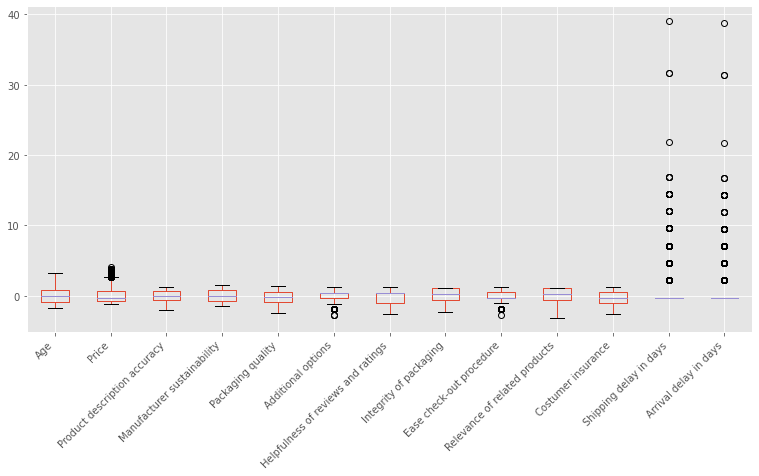

In [36]:
#We plotted the scaled data

fig, ax = plt.subplots(figsize=(13,6))
columns=['Age','Price','Product description accuracy','Manufacturer sustainability','Packaging quality',
         'Additional options','Helpfulness of reviews and ratings','Integrity of packaging','Ease check-out procedure',
         'Relevance of related products','Costumer insurance','Shipping delay in days','Arrival delay in days']
scaled_df.boxplot()
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Train-Test Data Split

In [37]:
#We separated X and y (explanatory variables and target variable), we allocate "Satisfaction" target column 
X = df_oversampled.drop(columns=['Satisfied'])
y = df_oversampled.iloc[:,7] 

X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Satisfied, dtype: uint8

In [38]:
from sklearn.model_selection import train_test_split

#We splitted our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.25,
                                                    stratify=y,
                                                    random_state= 123) 
print(X_train.shape,X_test.shape)

(39310, 20) (13104, 20)


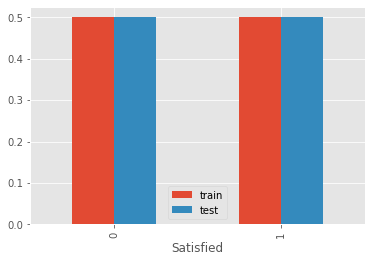

In [39]:
#Calculating the percentages to check for the balance of distribution of target groups.
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(figsize=(6,4)) 

# 3. MODELS

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# For each model we tried different hyper-parameters and finally used the ones leading to the highest f1 values. 

## KNN

In [41]:
#We started our models with KNN
#In our case the most important part is the false negative and false positive results.
#We don't want to lose unsatisfied customers by not doing marketing effort to them
#And we don't want to pay too much for marketing to reach already satisfied customers
#f1 score focuses on FN and FP. 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,11,12)}

# This function is created for Grid Search
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))

In [42]:
hyperp_search(classifier,parameters)
#We got f1 test equal to 82.6%    
#There are other values that are giving better f1 results, but we decided to take 10 in order not to overfit the model

f1_train: 0.812167 using {'n_neighbors': 10}
f1      train 0.853   test 0.826
precision  train 0.882   test 0.856

[[5673  879]
 [1321 5231]]


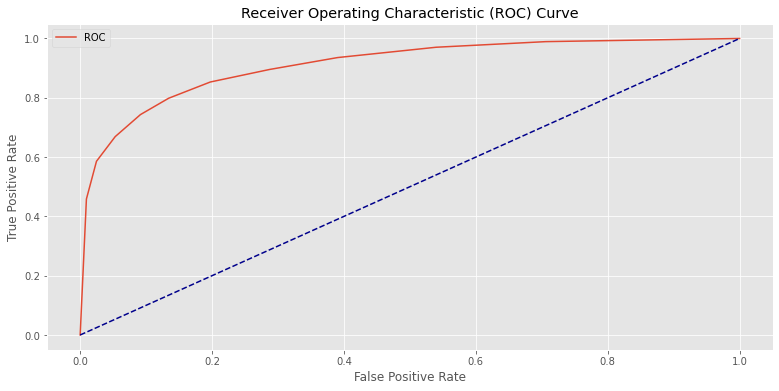

AUC: 0.91


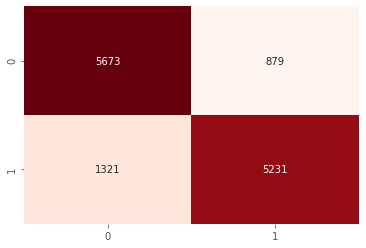

In [43]:
#Define a roc function to use for each model later. We added also the error matrix inside the function.
from sklearn.metrics import confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #probabilities for the target 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(13,6))
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);
    #We apply confusion matrix to see the results of model's performance and see the errors

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)
#A ROC curve showed us the relationship between False Positive Rate and True Positive Rate across different thresholds


## Desision Tree Classifier

In [44]:
#Next we used desision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [8,10,12],
              'min_samples_split': [15,20,20],
              'min_samples_leaf': [3,5,7]}

hyperp_search(classifier,parameters)

#We got f1 test equal to 83.8%
#There are other values that are giving better f1 results, but we decided to take 10,5,15 in order not to overfit the model

f1_train: 0.830762 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15}
f1      train 0.856   test 0.838
precision  train 0.852   test 0.836

[[5476 1076]
 [1053 5499]]


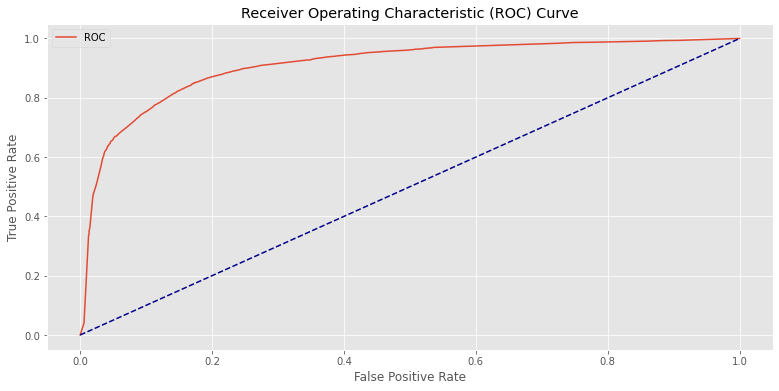

AUC: 0.91


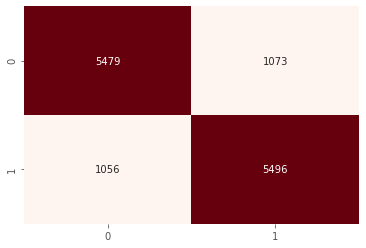

In [45]:
from sklearn.metrics import confusion_matrix
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=15)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


In [46]:
#We plotted decision tree
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=10)
print(r)


|--- Helpfulness of reviews and ratings <= 0.08
|   |--- Costumer insurance <= 0.12
|   |   |--- Ease check-out procedure <= 0.91
|   |   |   |--- Product description accuracy <= -1.65
|   |   |   |   |--- Price <= -0.32
|   |   |   |   |   |--- Age <= -1.29
|   |   |   |   |   |   |--- Integrity of packaging <= 0.71
|   |   |   |   |   |   |   |--- Price <= -1.14
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Price >  -1.14
|   |   |   |   |   |   |   |   |--- Age <= -1.44
|   |   |   |   |   |   |   |   |   |--- Price <= -1.06
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Price >  -1.06
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  -1.44
|   |   |   |   |   |   |   |   |   |--- Price <= -0.87
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Price >  -0.87
|   |   |   |   |   |   |   |   |   |   |--- class: 1

## Naive Bayes

In [47]:
# Next we used Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#We got f1 test equal to 73.6%

f1_score:  0.7356549569458204
f1_test:  0.7356549569458204
[[4808 1744]
 [1725 4827]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      6552
           1       0.73      0.74      0.74      6552

    accuracy                           0.74     13104
   macro avg       0.74      0.74      0.74     13104
weighted avg       0.74      0.74      0.74     13104



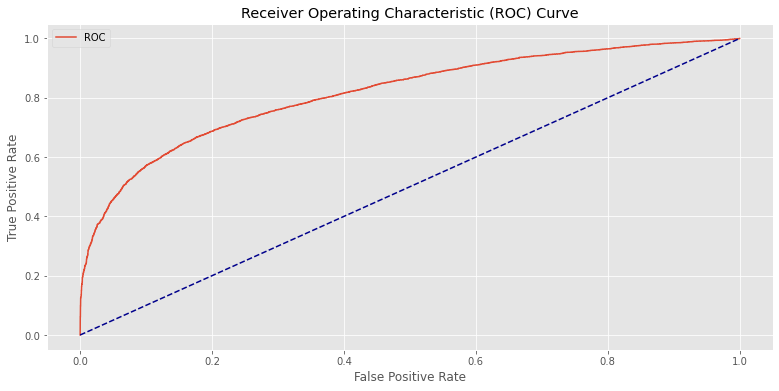

AUC: 0.82


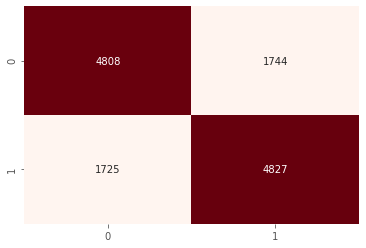

In [48]:
y_probs = model.predict_proba(X_test)
fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

## Logistic Regression

In [49]:
# We also tried logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1,2,3,4,5], "max_iter":[100] }


hyperp_search(classifier,parameters)
#We got f1 test equal to 75.7%

f1_train: 0.753539 using {'C': 3, 'max_iter': 100}
f1      train 0.753   test 0.757
precision  train 0.758   test 0.762

[[5018 1534]
 [1628 4924]]


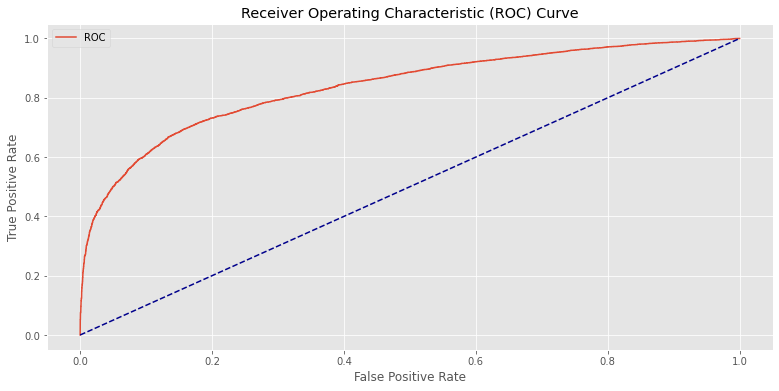

AUC: 0.84


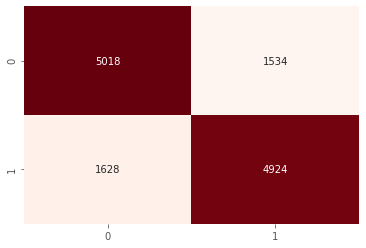

In [50]:
model = LogisticRegression(C=3, max_iter=100)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

In [51]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

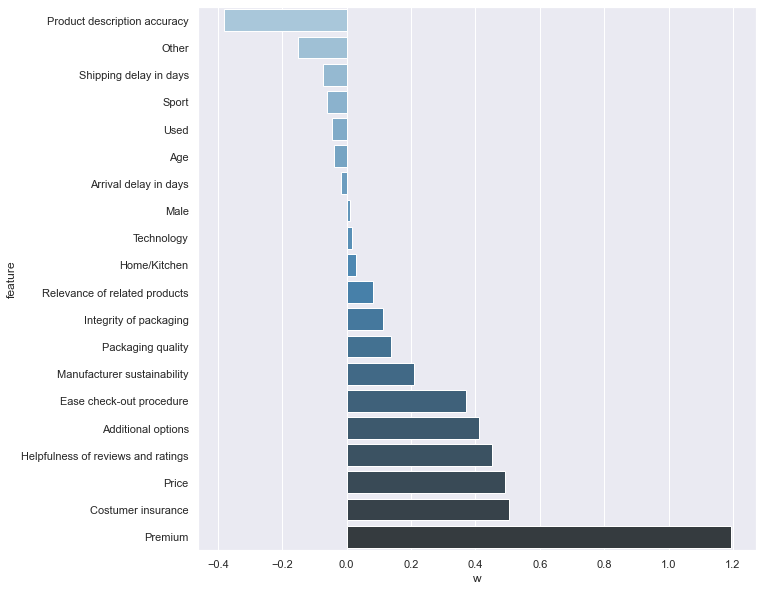

In [52]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})
#This graph shows us relatives weights of the variables of logistig regression model.
#We saw that Premium (Customer type) has the largest positive weight, Product description accuracy has the largest negative weight. 

## SVC

In [53]:
#This model works really slow, for this reason we put it with #
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

#We got f1 test equal to 87.2%
#In this case there is overfitting since the f1 of the train model is much more, we didn't search for the best parameters becouse of the slow speed of the model

f1_train: 0.857724 using {'C': 100, 'kernel': 'rbf'}
f1      train 0.947   test 0.872
precision  train 0.953   test 0.867

[[5667  885]
 [ 804 5748]]


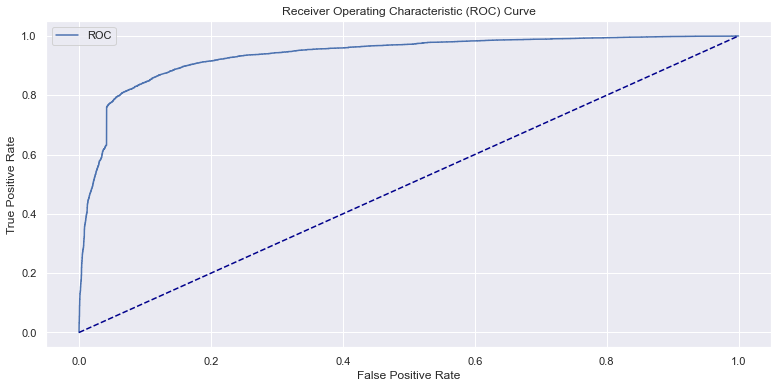

AUC: 0.94


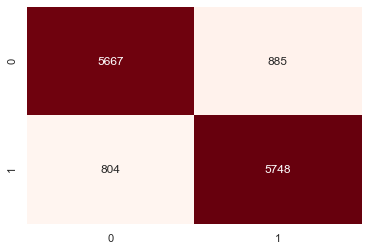

In [54]:
model = SVC(C=100, kernel='rbf',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


## Multi-Layer Perceptron Classifier

In [55]:
# Next we tried Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(20,5)],  "max_iter": [2000], "alpha": [0.001,0.01,0.1,1,10]}

hyperp_search(classifier,parameters)
#We got f1 test equal to 85.1%
#There are other values that are giving better f1 results, but we decided to take these values in order not to overfit the model

f1_train: 0.843689 using {'alpha': 0.1, 'hidden_layer_sizes': (20, 5), 'max_iter': 2000}
f1      train 0.854   test 0.851
precision  train 0.877   test 0.876

[[5781  771]
 [1123 5429]]


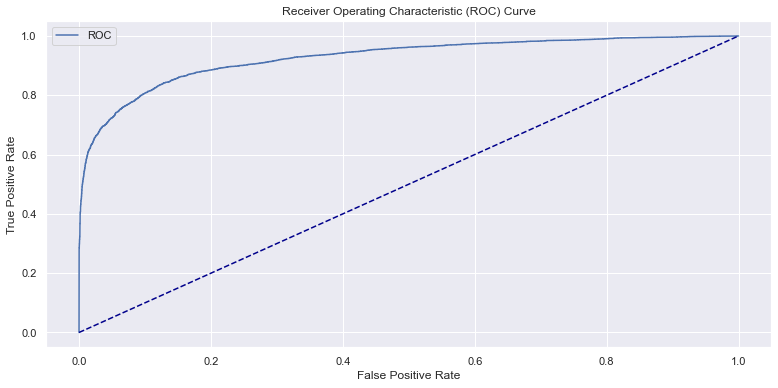

AUC: 0.93


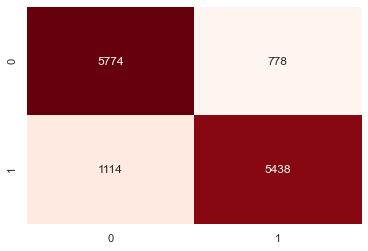

In [56]:
model_MLP=MLPClassifier(hidden_layer_sizes=(20,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

## Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=1))
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

print("f1_score: ", metrics.f1_score(y_test, y_pred))
#We got f1 equal to 77.5%

f1_score:  0.7750287246265799


In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[5108 1444]
 [1493 5059]]


In [59]:
#We used GRIDSEARCH to find best hyper-parameters for our model
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier(random_state=123)
parameters = {'n_estimators' : [1000],
    'learning_rate' : [0.01, 0.02,0.03,0.04,0.05]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=123), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'n_estimators': [1000]},
             scoring='f1', verbose=10)

In [60]:
#Got the results of GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#The best results are: learning_rate=0.05, n_estimators=1000

***GRIDSEARCH RESULTS***
Best score: 0.767700 using {'learning_rate': 0.05, 'n_estimators': 1000}
0.752480 (0.002362) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.761302 (0.004672) with: {'learning_rate': 0.02, 'n_estimators': 1000}
0.765293 (0.004593) with: {'learning_rate': 0.03, 'n_estimators': 1000}
0.766519 (0.004231) with: {'learning_rate': 0.04, 'n_estimators': 1000}
0.767700 (0.003867) with: {'learning_rate': 0.05, 'n_estimators': 1000}


In [61]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train) 


In [62]:
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

#We got f1 test equal to 77%

***RESULTS ON TRAIN SET***
f1_score:  0.7699652777777779
--
***RESULTS ON TEST SET***
f1_score:  0.7704489544895449


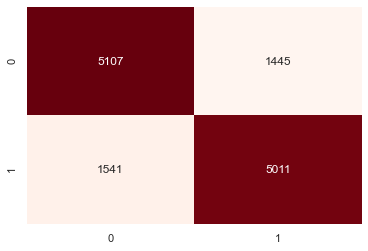

In [63]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      6552
           1       0.78      0.76      0.77      6552

    accuracy                           0.77     13104
   macro avg       0.77      0.77      0.77     13104
weighted avg       0.77      0.77      0.77     13104



In [65]:
clf = AdaBoostClassifier(n_estimators=1000, learning_rate=0.05)
clf.fit(X, y)

AdaBoostClassifier(learning_rate=0.05, n_estimators=1000)

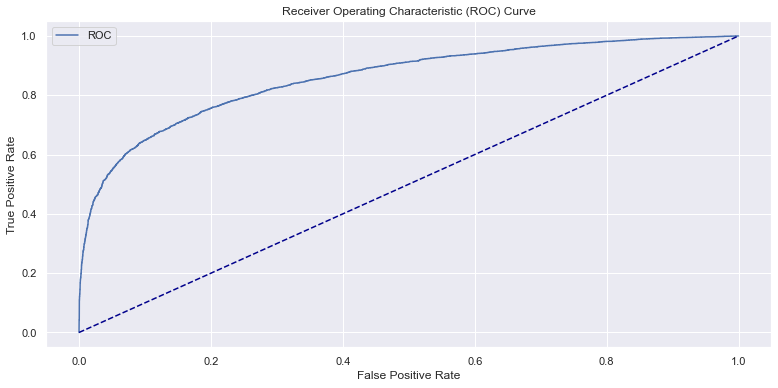

AUC: 0.86


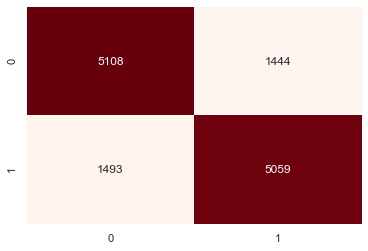

In [66]:
fpr7,tpr7 = roc(adaboost,X_train,y_train,X_test,y_test)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=40, min_samples_split=4, min_samples_leaf=1)
#rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

#We got f1 test equal to 92%

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6552
           1       0.92      0.91      0.92      6552

    accuracy                           0.92     13104
   macro avg       0.92      0.92      0.92     13104
weighted avg       0.92      0.92      0.92     13104



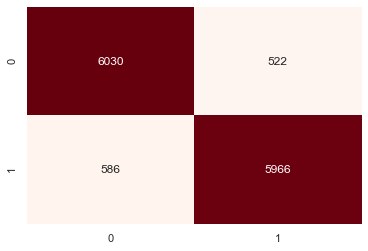

In [69]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

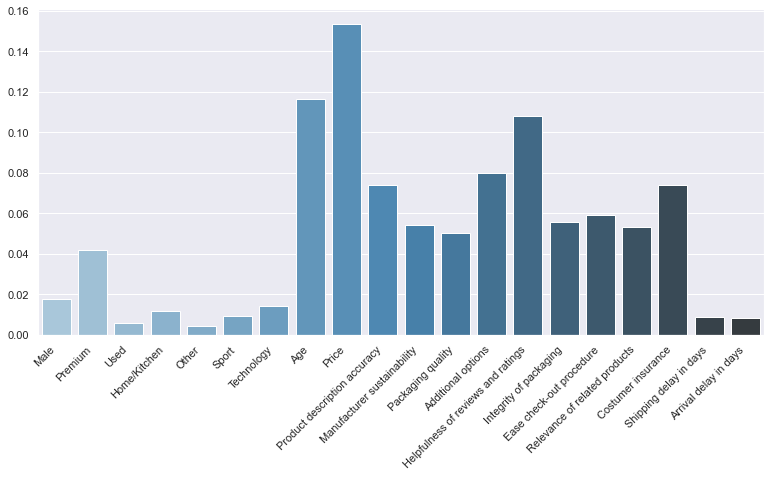

In [70]:
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(x=X_train.columns, y=rand_forest.feature_importances_, palette="Blues_d")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

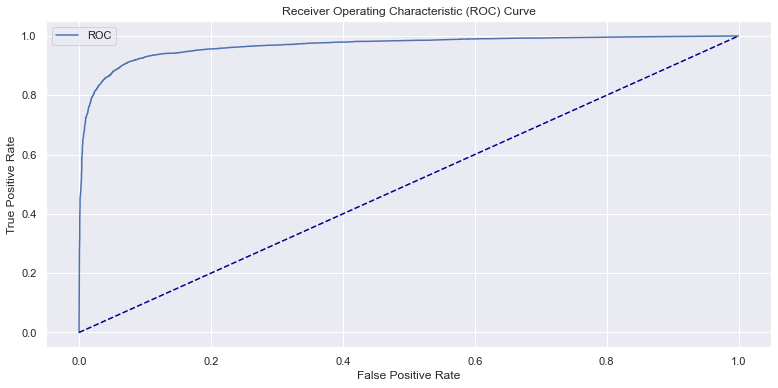

AUC: 0.97


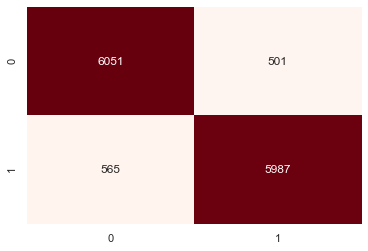

In [71]:
fpr8,tpr8 = roc(rand_forest,X_train,y_train,X_test,y_test)

## ROC Curve of All the Models Combined

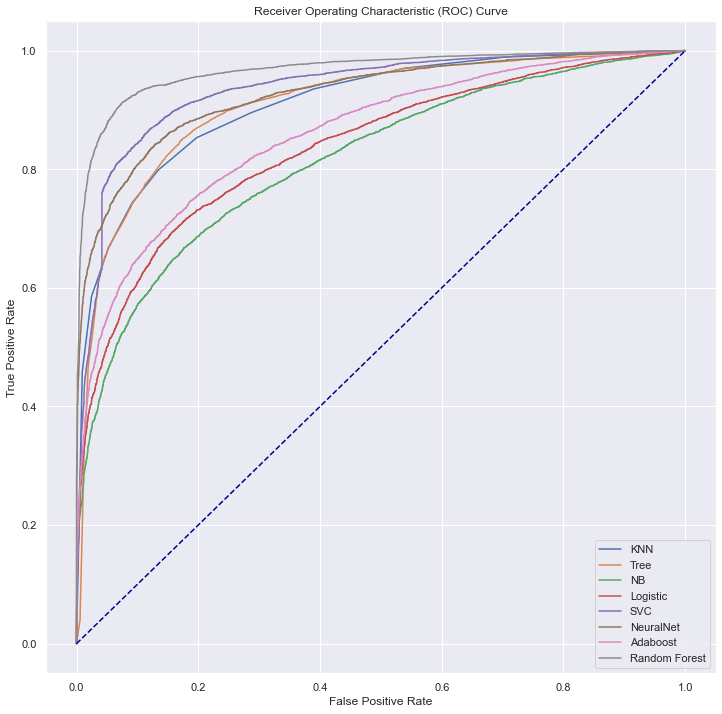

In [72]:
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVC")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "Adaboost")
plt.plot(fpr8, tpr8, label= "Random Forest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
#We compared all the models use to see chose the best one --> Random Forest

## Save the Model

In [73]:
import pickle
pickle.dump(rand_forest, open('rand_forest.pkl', 'wb'))

## Making predictions

In [14]:
import pickle
# load scaler modand el
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('rand_forest.pkl', 'rb'))

In [15]:
df_pred = pd.read_csv("prediction.csv")
df_pred

,Unnamed: 0,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,0,928P866c,Male,Premium,37.0,18.71,New,Home/Kitchen,1,1,5,3,5,2,2,5,5,0,0
1,1,728V461t,Female,Premium,49.0,110.89,Used,Technology,4,5,3,2,2,2,3,2,3,0,0
2,2,087W387u,Male,Premium,57.0,84.82,New,Home/Kitchen,2,2,4,2,2,2,4,2,5,0,0
3,3,284H293x,Female,Premium,53.0,65.35,New,Technology,5,1,3,5,5,5,4,4,3,0,0
4,4,947J480l,Female,Premium,56.0,284.60,New,Technology,3,3,4,5,5,5,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,850N839o,Female,Premium,55.0,158.25,New,Sport,1,1,5,3,3,3,5,3,3,0,0
19996,19996,243J568t,Female,Premium,38.0,280.26,New,Entertainment,0,4,3,1,1,1,5,1,5,0,0
19997,19997,219S119r,Female,Not Premium,26.0,123.70,New,Technology,2,4,2,5,3,4,5,4,2,0,0
19998,19998,114E814j,Female,Premium,47.0,123.84,New,Technology,5,3,5,3,4,4,5,4,5,0,0


In [16]:
df_pred.drop(df_pred.columns[df_pred.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [17]:
df_pred['id'].nunique()

19998

In [18]:
df_pred=df_pred.drop(columns=['id']) #id is a unique value for each customer. It has no useful information in classification. It can be eliminated.
df_pred.sample(5)

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
14114,Male,Premium,52.0,65.32,New,Other,5,5,5,5,5,5,4,5,3,0,0
5868,Female,Premium,36.0,117.43,New,Technology,2,2,4,4,4,4,3,4,3,0,0
5,Male,Premium,22.0,101.04,New,Entertainment,3,5,1,4,2,4,1,3,1,0,0
11228,Female,Premium,43.0,303.34,New,Home/Kitchen,2,2,5,4,4,4,3,4,3,0,0
4777,Female,Premium,32.0,57.08,Used,Technology,4,3,5,4,1,4,4,3,5,0,0


In [19]:
df_pred.describe()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
count,18448.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,41.569330,117.787074,3.068550,2.962950,3.18365,3.356050,3.331950,3.614650,3.264000,3.620150,3.268650,0.114550,0.115150
std,13.585731,99.616779,1.513527,1.264973,1.33222,1.297136,1.318388,1.186603,1.268142,1.180184,1.320214,0.425485,0.426497
min,18.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,42.650000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,41.000000,82.675000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,52.000000,170.742500,4.000000,4.000000,4.00000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000
max,85.000000,515.510000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000


In [20]:
df_pred.info(verbose=True) #Data types and number of non-null cells are checked for each column. There are null cells in the Licence_Type column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              20000 non-null  object 
 1   Customer Type                       20000 non-null  object 
 2   Age                                 18448 non-null  float64
 3   Price                               20000 non-null  float64
 4   NewUsed                             20000 non-null  object 
 5   Category                            20000 non-null  object 
 6   Product description accuracy        20000 non-null  int64  
 7   Manufacturer sustainability         20000 non-null  int64  
 8   Packaging quality                   20000 non-null  int64  
 9   Additional options                  20000 non-null  int64  
 10  Helpfulness of reviews and ratings  20000 non-null  int64  
 11  Integrity of packaging              20000

In [81]:
# If there is a feature with null count > 0, we will run this code
#df_pred.isna().sum() #Number of null cells detected in Age column.

## EXPLANOTARY DATA ANALYSIS

In [22]:
# df_pred["Satisfied"] = pd.get_dummies(df_pred['Satisfaction'],drop_first=True)  
# df_pred=df_pred.drop(columns=['Satisfaction'])
# df_pred.sample(5)

## Data Preparation

In [23]:
columns=['Gender','Customer Type', 'NewUsed', 'Category']

dummy_df_pred=[]
dummy_df_pred=pd.DataFrame(dummy_df_pred)

for i in columns:
    dummy_pred= pd.get_dummies(df_pred[i],drop_first=True)
    #drop_first=True --> Whether to get k-1 dummies out of k categorical levels by removing the first level.
    dummy_df_pred = pd.concat([dummy_df_pred,dummy_pred], axis = 1)

df_pred=pd.concat([dummy_df_pred,df_pred], axis = 1)

Dummy variables are assigned for the columns that contains categorical data.

In [24]:
df_pred.drop(columns=columns,inplace=True)
#df_pred.head()

In [25]:
# #Separate X and y (explanatory variables and target variable)
# X_pred = df_pred.drop(columns=['Satisfied'])
# y_pred = df_pred.iloc[:,20] 

# X_pred.head()
# #y_pred.head()

In [26]:
# We will scale the prediction data by using the scaler that we got from train data

columns=[#"Male","Premium","Used","Home/Kitchen","Other","Sport","Technology",
         "Age","Price",
         "Product description accuracy","Manufacturer sustainability","Packaging quality","Additional options",
         "Helpfulness of reviews and ratings","Integrity of packaging","Ease check-out procedure",
         "Relevance of related products","Costumer insurance",
         "Shipping delay in days","Arrival delay in days"]
                             
X_pred_to_scale=X_pred[columns]
X_pred_scaled= pd.DataFrame(loaded_scaler.transform(X_pred_to_scale))
X_pred_scaled.columns = X_pred_to_scale.columns
X_pred_scaled


NameError: name 'X_pred' is not defined

In [87]:
X_pred.drop(columns=columns, inplace=True)
X_pred.reset_index(drop=True, inplace=True)
X_pred_scaled.reset_index(drop=True, inplace=True)
X_pred=pd.concat([X_pred,X_pred_scaled], axis = 1)
X_pred

,Male,Premium,Used,Home/Kitchen,Other,Sport,Technology,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days
0,0,1,0,0,0,0,0,1.296989,-1.062208,0.638584,1.560787,0.569837,-0.343054,0.456585,0.289312,-0.285942,0.282429,0.502729,-0.262725,-0.266012
1,0,1,0,0,0,0,0,-1.101680,1.319412,1.292068,1.560787,0.569837,-0.343054,1.219341,0.289312,1.303216,0.282429,0.502729,-0.262725,-0.266012
2,0,1,1,0,0,0,0,0.397488,-0.841354,-1.321866,0.018552,-0.943434,0.436316,0.456585,1.134858,-1.080520,0.282429,-1.804495,-0.262725,2.171110
3,0,1,0,0,0,0,1,1.896656,1.523920,1.292068,0.018552,-1.700069,1.215686,0.456585,1.134858,1.303216,0.282429,-1.804495,-0.262725,2.171110
4,0,1,0,0,0,0,0,0.247571,-0.419008,-1.321866,-1.523684,0.569837,-1.901795,-0.306170,-2.247324,-1.080520,-1.417040,0.502729,-0.262725,-0.266012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,1,1,0,0,0,1,0,-0.202179,-0.704367,1.292068,0.789670,-0.186799,-0.343054,-1.068926,1.134858,0.508637,1.132163,-0.266346,-0.262725,-0.266012
2824,1,1,0,0,0,0,0,-0.202179,0.190334,-1.321866,0.018552,-1.700069,-0.343054,-1.068926,-0.556233,0.508637,-0.567305,-1.804495,-0.262725,-0.266012
2825,0,1,0,0,0,0,1,-0.202179,-0.788719,-0.668382,0.789670,-0.943434,-1.122424,-0.306170,0.289312,-1.875099,-0.567305,-1.035420,-0.262725,-0.266012
2826,0,1,0,0,0,1,0,-0.202179,0.956317,0.638584,0.018552,-1.700069,-0.343054,1.219341,-0.556233,-0.285942,0.282429,-1.804495,-0.262725,-0.266012


In [88]:
X_pred.columns

Index(['Male', 'Premium', 'Used', 'Home/Kitchen', 'Other', 'Sport',
       'Technology', 'Age', 'Price', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Ease check-out procedure',
       'Relevance of related products', 'Costumer insurance',
       'Shipping delay in days', 'Arrival delay in days'],
      dtype='object')

In [89]:
y_random_forest_predictions = loaded_model.predict(X_pred)

In [90]:
print("f1: ", f1_score(y_pred,y_random_forest_predictions))
print(confusion_matrix(y_pred,y_random_forest_predictions))
print(classification_report(y_pred,y_random_forest_predictions))

f1:  0.9245364381198792
[[1581   36]
 [ 139 1072]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1617
           1       0.97      0.89      0.92      1211

    accuracy                           0.94      2828
   macro avg       0.94      0.93      0.94      2828
weighted avg       0.94      0.94      0.94      2828

